# 1. Import images

In [1]:
import scipy.io
data = scipy.io.loadmat('data/ex3data1.mat')

# A 5000x400matrix, each row representing a 20x20 pixel image
X = data['X']

# A 5000-dimensional matrix, each element representing the number shown in the corresponding image
Y = data['y']

# 2. Display selection of images

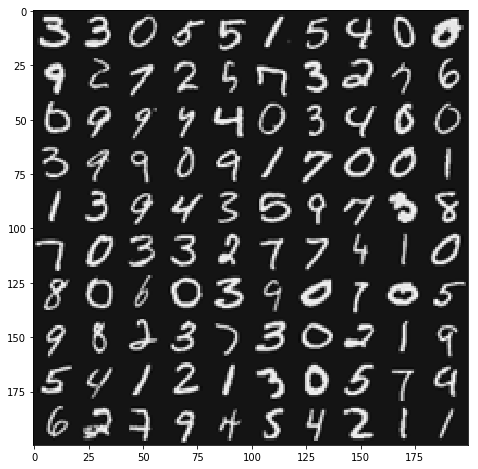

In [2]:
import numpy as np
import random
from matplotlib import pyplot as plt

img_arr = np.empty([20, 220])
for j in range(0, 10):
    img_row = np.empty([20, 20])
    for i in range(0, 10):
        img = X[random.randint(1, 5000)].reshape(20, 20)
        img_row = np.concatenate((img_row, img), axis=1)
    img_arr = np.concatenate((img_arr, img_row), axis=0)

plt.figure(figsize=(12,8))
plt.imshow(img_arr[20:, 20: ].T, interpolation="nearest", cmap='gray')

# Show random selection of 100 images using imshow
plt.show()

# 3. Vectorizing the Cost function

In [3]:
def sigmoid(vec):
    return 1/(1 + np.exp(-vec))

def h(theta, vec):
    return sigmoid(np.dot(vec, theta.T))

def cost_function(theta, X, Y):
#     print np.dot(Y, np.array([np.log(h(theta, X))]).T)
    return float((np.sum(-np.dot(Y, np.array([np.log(h(theta, X))]))) -
                  np.sum(np.dot((1-Y), np.array([np.log(1-h(theta, X))]))))/
                 Y.shape[0])

# 4. Vectorized Gradient Descent

In [4]:
X = np.append(np.ones((X.shape[0], 1)), X, axis=1)
theta = np.zeros((1, 401))
def gradient(theta, X, Y):
    Y = np.array([Y]).T
    gradient = np.array(np.dot(X.T, (h(theta, X) - Y)).T/Y.shape[0])
    return gradient.reshape(1, 401)

# 5. Regularization

## 5.1 Regularizing the Cost function

In [5]:
def regularized_cost_function(theta, X, Y):
    regular_cost = cost_function(theta, X, Y)
    lambda_ = 100
    cost = regular_cost + (lambda_/(2*Y.shape[0]))*np.sum(theta[1:] * theta[1:])
    return cost

## 5.2 Regularizing the Gradient

In [6]:
def regularized_gradient(theta, X, Y):
    regular_gradient = gradient(theta, X, Y)
    lambda_ = 100
    regularization_vec = np.copy(theta)
    regularization_vec = regularization_vec + (lambda_/Y.shape[0])
    regularization_vec[0, 0] = 0
    print regularization_vec.shape
    return regularization_vec

# 6. One-vs-All Classification using Logistic Regression

In [7]:
import scipy.optimize as opt

big_theta = np.zeros((10, 401))
for i in range(1, 10):
    print i
    big_theta[i] = opt.fmin_tnc(func=regularized_cost_function, x0=big_theta[i],
                                fprime=regularized_gradient, args=(X, Y))
    
print big_theta

1


ValueError: total size of new array must be unchanged